### Importing the Library

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from extract_label import parse_sas_html

In [13]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 350 entries, _STATE to _DRNKDRV
dtypes: float64(345), int64(5)
memory usage: 1.1 GB


In [14]:
print(f"Number of feature: {df.shape[1]} features")
print(f"Number of row: {len(df)} rows")
df.head()

Number of feature: 350 features
Number of row: 433323 rows


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,3012023,3,1,2023,1100.0,2023000001,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,1062023,1,6,2023,1100.0,2023000002,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,3082023,3,8,2023,1100.0,2023000003,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,3062023,3,6,2023,1100.0,2023000004,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,1062023,1,6,2023,1100.0,2023000005,2.023000e+09,1.0,...,7.0,1.0,47.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [15]:
def missing_value_summary(df: pd.DataFrame):
    missing_count = df.isna().sum()
    missing_percentage = (df.isna().mean() * 100).round(2)
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage (%)': missing_percentage
    }).sort_values(by='Missing Count', ascending=False)
    return missing_summary

In [16]:
def draw_missing_data_distribution(df: pd.DataFrame):
    plt.figure(figsize=(10,5))
    plt.hist(df["Missing Percentage (%)"], bins = 50, color='royalblue', edgecolor='black')
    plt.xlabel("Missing Percentage (%)")
    plt.ylabel("Number of Features")
    plt.title('Distribution of Missing Data Percentage Across Features')
    plt.show()

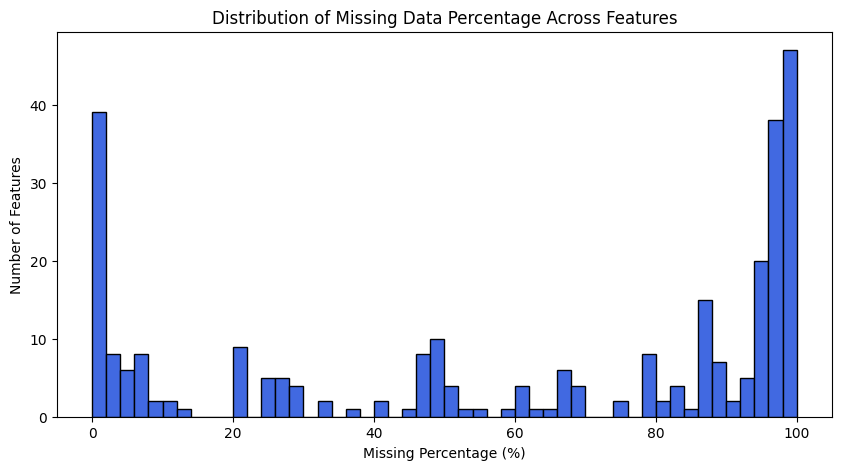

In [17]:
missing_value = missing_value_summary(df)
missing_value = missing_value[missing_value["Missing Count"] > 0]
draw_missing_data_distribution(missing_value)

#### Dropping feature which have missing value that larger than 20%

In [18]:
threshold = 20
col_to_drop = missing_value[missing_value["Missing Percentage (%)"] > threshold].index
print(f"Number of column that have more than {threshold}% missing data: {len(col_to_drop)}")
col_to_drop

Number of column that have more than 20% missing data: 221


Index(['WKDAYOUT', 'INDORTAN', 'SUNPRTCT', 'NUMBURN3', 'WKENDOUT', 'COLGHOUS',
       'LASTSIG4', 'LNDSXBRT', 'CSRVCTL2', 'VCLNTES2',
       ...
       'EXRACT12', 'CSTATE1', 'HHADULT', 'CELLSEX2', 'LANDLINE', 'SAFETIME',
       'CTELNUM1', 'PVTRESD3', 'CADULT1', 'CELLFON5'],
      dtype='object', length=221)

In [19]:
df = df.drop(columns=col_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 129 entries, _STATE to _DRNKDRV
dtypes: float64(124), int64(5)
memory usage: 426.5 MB


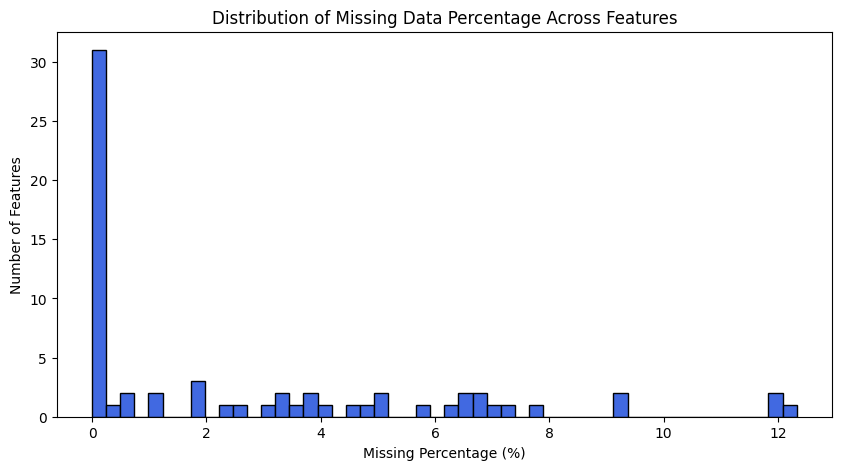

In [20]:
missing_value = missing_value_summary(df)
missing_value = missing_value[missing_value["Missing Count"] > 0]
draw_missing_data_distribution(missing_value)

#### Decode the data

In [21]:
sas_variable, value_labels = parse_sas_html("Original Data/USCODE23_LLCP_091024.HTML")


In [22]:
missing_value_summary(df)

,Missing Count,Missing Percentage (%)
CHOLMED3,53440,12.33
TOLDHI3,51812,11.96
_RFCHOL3,51811,11.96
_BMI5CAT,40535,9.35
_BMI5,40535,9.35
...,...,...
_TOTINDA,0,0.00
_HCVU653,0,0.00
_HLTHPL1,0,0.00
_MENT14D,0,0.00


In [23]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,SEXVAR,...,_CURECI2,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,3012023,3,1,2023,1100.0,2023000001,2.023000e+09,2.0,...,1.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,9.0
1,1.0,1.0,1062023,1,6,2023,1100.0,2023000002,2.023000e+09,2.0,...,1.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,3082023,3,8,2023,1100.0,2023000003,2.023000e+09,2.0,...,1.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,3062023,3,6,2023,1100.0,2023000004,2.023000e+09,2.0,...,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,1062023,1,6,2023,1100.0,2023000005,2.023000e+09,2.0,...,1.0,1.0,7.0,1.0,47.0,1.0,2.0,1.0,1.0,2.0


In [30]:
cols = df.columns
for col in cols:
    print(f"{col}: \t {sas_variable[col]}")

_STATE: 	 State FIPS Code
FMONTH: 	 File Month
IDATE: 	 Interview Date
IMONTH: 	 Interview Month
IDAY: 	 Interview Day
IYEAR: 	 Interview Year
DISPCODE: 	 Final Disposition
SEQNO: 	 Annual Sequence Number
_PSU: 	 Primary Sampling Unit
SEXVAR: 	 Sex of Respondent
GENHLTH: 	 General Health
PHYSHLTH: 	 Number of Days Physical Health Not Good
MENTHLTH: 	 Number of Days Mental Health Not Good
PRIMINS1: 	 What is Current Primary Source of Health Insurance?
PERSDOC3: 	 Have Personal Health Care Provider?
MEDCOST1: 	 Could Not Afford To See Doctor
CHECKUP1: 	 Length of time since last routine checkup
EXERANY2: 	 Exercise in Past 30 Days
STRENGTH: 	 How many times did you do physical activities or exercises to STRENGTHEN your muscles?
BPHIGH6: 	 Ever Told Blood Pressure High
CHOLCHK3: 	 How Long since Cholesterol Checked
TOLDHI3: 	 Ever Told Cholesterol Is High
CHOLMED3: 	 Currently taking medicine for high cholesterol
CVDINFR4: 	 Ever Diagnosed with Heart Attack
CVDCRHD4: 	 Ever Diagnosed with

_STATE
FMONTH
IDATE
IMONTH
IDAY
IYEAR
DISPCODE
SEQNO
_PSU
SEXVAR
GENHLTH
PHYSHLTH
MENTHLTH
PRIMINS1
PERSDOC3
MEDCOST1
CHECKUP1
EXERANY2
STRENGTH
BPHIGH6
CHOLCHK3
TOLDHI3
CHOLMED3
CVDINFR4
CVDCRHD4
CVDSTRK3
ASTHMA3
CHCSCNC1
CHCOCNC1
CHCCOPD3
ADDEPEV3
CHCKDNY2
HAVARTH4
DIABETE4
MARITAL
EDUCA
RENTHOM1
CPDEMO1C
VETERAN3
EMPLOY1
CHILDREN
INCOME3
WEIGHT2
HEIGHT3
DEAF
BLIND
DECIDE
DIFFWALK
DIFFDRES
DIFFALON
SMOKE100
USENOW3
ECIGNOW2
ALCDAY4
FLUSHOT7
PNEUVAC4
HIVTST7
SEATBELT
COVIDPO1
QSTVER
QSTLANG
_METSTAT
_URBSTAT
_STSTR
_STRWT
_RAWRAKE
_WT2RAKE
_IMPRACE
_DUALUSE
_LLCPWT2
_LLCPWT
_RFHLTH
_PHYS14D
_MENT14D
_HLTHPL1
_HCVU653
_TOTINDA
MAXVO21_
FC601_
STRFREQ_
PAMISS3_
_PACAT3
_PAINDX3
_PA150R4
_PA300R4
_PA30023
_PASTRNG
_PAREC3
_PASTAE3
_RFHYPE6
_CHOLCH3
_RFCHOL3
_MICHD
_LTASTH1
_CASTHM1
_ASTHMS1
_DRDXAR2
_MRACE1
_HISPANC
_RACE
_RACEG21
_RACEGR3
_RACEPRV
_SEX
_AGEG5YR
_AGE65YR
_AGE80
_AGE_G
HTIN4
HTM4
WTKG3
_BMI5
_BMI5CAT
_RFBMI5
_CHLDCNT
_EDUCAG
_INCOMG1
_SMOKER3
_RFSMOK3
_CURECI2
DRNKANY6
DR